<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/nonlinear_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

С заданной абсолютной погрешностью  Δ  найти приближенное значение корня уравнения  $f(x)=0$ , лежащее в интервале  $(0,10)$ Использовать метод дихотомии и метод Ньютона.

1. Прочитать соответствующие главы $(2.1, 2.2)$ в учебнике Калиткина $[1]$. Вопросы для самопроверки:
  - Какие есть ограничения на применение метода дихотомии? На какой теореме основывается этот метод?\
  Ответ: \
  основывается на непрерывности функции $f(x)$ на $[a, b]$ и при произведении функций на концах отрезков получается отрицательное число, то по крайней мере существует хотя бы один корень исходного уравнения.
  - Критерий окончания счета в методе дихотомии?\
  Ответ: \
  Разность интервалов, в котором задан корень уравнения меньше искомой погрешности $|a_n - b_n| < \varepsilon$ \
  Количество итераций равняется:
   $n \geq \log_2 \left( \frac{b_n - a_n}{\varepsilon_x} \right)$

  - Достоинства и недостатки метода дихотомии? \
  Ответ: \
  Достоинства: \
  1) От функии требуется только непрерывность\
  2) Метод очень прост, исключительно надежен и всегда сходится к корню\
  3) На каждой итерации значение функции вычисляется только один раз\
  Недостатки: \
  1) Нужно заранее найти отрезок, на концах которрого функция имеет разные знаки\
  2) Если у функции на отрезке $[a,b]$ имеется несколько корней, то заранее неизвестно, к какому из них сойдется дихотомия\
  3) Метод не позволяет найти корни четной кратности\
  4) Корни нечетной кратности находятся, но кратность их установить невозможно, а процесс тем более чувствителен к ошибкам округления, чем выше кратность корня\
  5) Для многочлена невозможно вычислить комплексные корни\
  6) Дихотомия не обобщается на случай функции многих переменных \
  - Какие есть ограничения на применение метода Ньютона? \
  Ответ: \
   Функция $f(x)$ непрерывна вместе со своей производной на отрезке $[a,b]$
  - Критерий окончания счета в метода Ньютона?
  Ответ: \
  Разность интервалов, в котором задан корень уравнения меньше искомой погрешности $|x_{n+1} - x_n| < \varepsilon$ \
  - Достоинства и недостатки метода Ньютона?
Ответ: \
Достоинства: \
1) Сходится для корней любой кратности\
2) Квадратичная сходимость вблизи простого корня\
3) Возможность диагностики кратности корня\
4) Не нужно искать отрезок, на котором функция меняет знак\
5) Обобщается на случай многих переменных\
Недостатки: \
1) При далеком начальном приближении сходимость не гарантирована


Заданная функция: \
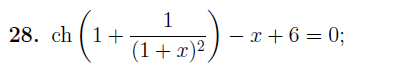




2. Реализовать алгоритмы поиска приближенного значения корня с заданной абсолютной погрешностью методами дихотомии и Ньютона в виде отдельных функций.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Определение функции и её производной
def function(x):
    return math.cosh(1 + 1/((1 + x)**2)) - x + 6

def function_der(x):
    numerator = x**2 + 2*x + 2
    denominator = x**2 + 2*x + 1
    arg = numerator / denominator
    sh_term = math.sinh(arg)

    return -2 * sh_term / ((x + 1)**3) - 1

# Метод дихотомии
def bisection(function, a=0, b=10, eps=1e-6, max_iters=100):
    if function(a) * function(b) >= 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала [a, b]")

    iter_count = 0
    while b - a > eps and iter_count < max_iters:
        iter_count += 1
        midpoint = (a + b) / 2.0
        if function(a) * function(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    if iter_count >= max_iters:
        raise Exception("Превышено максимальное количество итераций")

    return (a + b) / 2.0 , iter_count

# Метод Ньютона
def newton(function, function_der, x0, eps=1e-6, max_iters=100):
    iter_count = 0
    x = x0

    while abs(function(x)) > eps and iter_count < max_iters:
        iter_count += 1
        if function_der(x) == 0:
            raise ValueError("Производная равна нулю, метод Ньютона не может быть применен")
        x = x - function(x) / function_der(x)

    if iter_count >= max_iters:
        raise Exception("Превышено максимальное количество итераций")

    return x, iter_count

3. Изобразите на графике функцию  $f(x)$ Зафиксировав значение абсолютной погрешности, запустите поиск корня методом дихотомии на разных интервалах. Зафиксировав значение абсолютной погрешности, запустите поиск корня методом Ньютона с разнымм значениями начального приближения (разной отдаленности от искомого корня). Получилось ли найти корень функции? Проверьте визуально по графику.

--------------------------------------МЕТОД ДИХОТОМИИ при eps = 1e-6--------------------------------------

Ошибка на интервале (2, 3): Функция должна иметь разные знаки на концах интервала [a, b]
Ошибка на интервале (8, 10): Функция должна иметь разные знаки на концах интервала [a, b]
Ошибка на интервале (-2, -1.5): Функция должна иметь разные знаки на концах интервала [a, b]
Интервал: (0, 10) - Корень: 7.55926638841629, Итерации: 24
Интервал: (0, 100) - Корень: 7.559266313910484, Итерации: 27
Интервал: (0, 1000000000) - Корень: 7.559266546053323, Итерации: 50

--------------------------------------МЕТОД НЬЮТОНА  при eps = 1e-6--------------------------------------

Начальное приближение: -2 - Корень: 7.559266171037773, Итерации: 4
Начальное приближение: 1 - Корень: 7.559266164824439, Итерации: 3
Начальное приближение: 2 - Корень: 7.559266171889788, Итерации: 3
Начальное приближение: -0.5 - Корень: 7.559266115566005, Итерации: 7
Начальное приближение: -0.8 - Корень: 7.559266171899299,

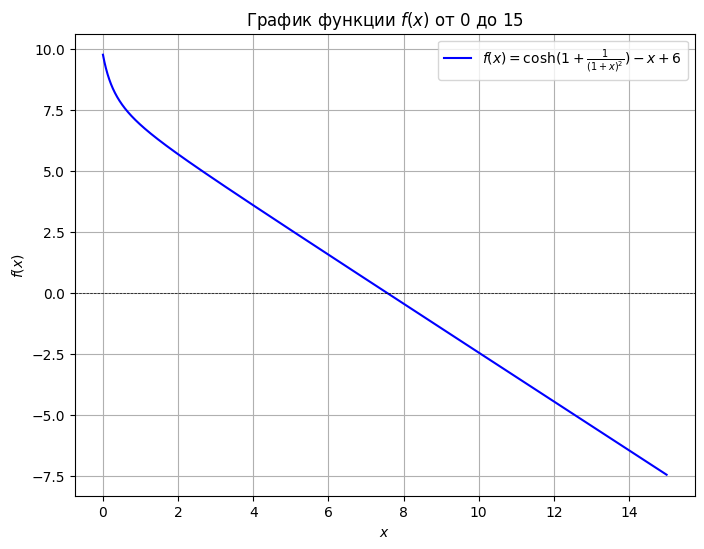

In [6]:
# Генерация данных для графика с безопасным диапазоном значений x
x_values = np.linspace(0, 15, 10000)  # Избегаем x = -1, где (1 + x)^2 становится 0
y_values = [function(x) for x in x_values]

# Проверка метода дихотомии на разных интервалах
intervals = [(2, 3), (8, 10), (-2, -1.5), (0, 10), (0, 100), (0, 1000000000)]
bisection_results = []
print("--------------------------------------МЕТОД ДИХОТОМИИ при eps = 1e-6--------------------------------------\n")
# Проверка метода дихотомии
for a, b in intervals:
    try:
        root_bisect, iter_bisect = bisection(function, a, b)
        print(f"Интервал: ({a}, {b}) - Корень: {root_bisect}, Итерации: {iter_bisect}")
    except ValueError as e:
        print(f"Ошибка на интервале ({a}, {b}): {e}")
print("\n--------------------------------------МЕТОД НЬЮТОНА  при eps = 1e-6--------------------------------------\n")

# Поиск корня методом Ньютона с разными начальными приближениями
x0_values = [-2, 1, 2, -0.5, -0.8, 1e+100, 1e+300, 1e+1000]  # Разные начальные приближения

for x0 in x0_values:
    try:
        root_newton, iter_newton = newton(function, function_der, x0)
        print(f"Начальное приближение: {x0} - Корень: {root_newton:}, Итерации: {iter_newton}")
    except (ValueError, Exception) as e:
        print(f"Ошибка с начальным приближением {x0}: {e}")
print()

# Визуализация графика функции
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \cosh(1 + \frac{1}{(1+x)^2}) - x + 6$', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Настройка графика
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("График функции $f(x)$ от 0 до 15")
plt.legend()
plt.grid()
plt.show()

4. Зафиксировав интервал (для метода дихотомии) и начальное приближение (для метода Ньютона), меняйте значение абсолютной погрешности. Для каждого метода, для значений абсолютной погрешности  $Δ=10^{−3},10^{−6},10^{−9}$  вывести в консоль

In [9]:
# Фиксированные параметры
interval_bisection = (2, 10)  # Интервал для метода дихотомии
x0_newton = 2  # Начальное приближение для метода Ньютона

# Абсолютные погрешности для проверки
epsilons = [1e-3, 1e-6, 1e-9]

# Метод дихотомии
print("--------------------------------------МЕТОД ДИХОТОМИИ при фиксированном интервале--------------------------------------\n")
for eps in epsilons:
    try:
        root_bisect, iter_bisect = bisection(function, interval_bisection[0], interval_bisection[1], eps)
        # Невязка
        residual = function(root_bisect)
        print(f"Delta = {eps}, x = {root_bisect}, Невязка = {residual}, Итерации = {iter_bisect}")
    except ValueError as e:
        print(f"Ошибка на интервале {interval_bisection}: {e}")

# Метод Ньютона
print("\n--------------------------------------МЕТОД НЬЮТОНА при фиксированном начальном приблежении--------------------------------------\n")
for eps in epsilons:
    try:
        root_newton, iter_newton = newton(function, function_der, x0_newton, eps)
        # Невязка
        residual_newton = function(root_newton)
        print(f"Delta = {eps}, x = {root_newton}, Невязка = {residual_newton}, Итерации = {iter_newton}")
    except (ValueError, Exception) as e:
        print(f"Ошибка с начальным приближением {x0_newton}: {e}")

--------------------------------------МЕТОД ДИХОТОМИИ при фиксированном интервале--------------------------------------

Delta = 0.001, x = 7.55908203125, Невязка = 0.00018484331905099793, Итерации = 13
Delta = 1e-06, x = 7.559266567230225, Невязка = -3.9683942887336343e-07, Итерации = 23
Delta = 1e-09, x = 7.559266171883792, Невязка = 1.5573320411021996e-11, Итерации = 33

--------------------------------------МЕТОД НЬЮТОНА при фиксированном начальном приблежении--------------------------------------

Delta = 0.001, x = 7.559147350912283, Невязка = 0.00011927439557712916, Итерации = 2
Delta = 1e-06, x = 7.559266171889788, Невязка = 9.554135260714247e-12, Итерации = 3
Delta = 1e-09, x = 7.559266171889788, Невязка = 9.554135260714247e-12, Итерации = 3
